In [1]:
import nltk
import pandas as pd
import string
import re
from collections import Counter
from nltk.corpus import stopwords

In [2]:
#READ DATA : FILE.CSV WHERE NEWS ARTICLES ARE STORED AFTER CRAWLING
data=pd.read_csv('file.csv')

In [3]:
#COLUMNS OF DATA FILE
data.columns

Index(['url', 'title', 'body', 'summary'], dtype='object')

In [4]:
#TOP 5 ROWS OF DATA
data.head()

,url,title,body,summary
0,https://www.linkedin.com/feed/news/states-to-s...,States to set their reopening plans,Reopening the U.S. economy will take place in ...,Reopening the U.S. economy will take place in ...
1,https://www.linkedin.com/feed/news/china-ends-...,China ends its growth streak,The world's second largest economy officially ...,The world's second largest economy officially ...
2,https://www.linkedin.com/feed/news/big-tech-hi...,Big Tech hints at workforce changes,Some of the world's biggest tech companies are...,Some of the world's biggest tech companies are...
3,https://www.linkedin.com/feed/news/workshare-p...,Workshare programs grow in demand,"Texas, Oregon, Colorado, Wisconsin and Arkansa...","Texas, Oregon, Colorado, Wisconsin and Arkansa..."
4,https://www.linkedin.com/feed/news/can-the-cru...,Can the cruise industry survive?,The world’s biggest cruise ship companies are ...,The world’s biggest cruise ship companies are ...


In [5]:
#DESCRIBE THE DATA STORED IN FILE
data.describe()

,url,title,body,summary
count,29232,29227,26353,26353
unique,20242,19083,14390,14025
top,https://food.ndtv.com/lists/10-best-eggless-ca...,"Business News, Economic News, Market News, Sha...","CNN name, logo and all associated elements ® a...","CNN name, logo and all associated elements ® a..."
freq,15,58,1975,1975


In [6]:
#TOTAL DATA ROWS
len(data)

29232

In [7]:
#Remove capitalization and punctuation from our corpus
def clean_text(data):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", data.lower())
    return re.sub(r'\W+', ' ', clean1)

In [8]:
#NEW COLUMN REPRESENTING CLEANED ARTICLES DATA

data['tokenized'] = data['body'].map(lambda x: clean_text(str(x)))

In [9]:
#TOTAL NUMBER OF WORDS IN ARTICLE
data['num_wds'] = data['tokenized'].apply(lambda x: len(x.split()))
#MEAN OF WORDS PER ARTICLE
print(data['num_wds'].mean())
#MAXIMUM WORDS IN AN ARTICLE
print(data['num_wds'].max())
#MINIMUM WORDS IN AN ARTICLE
print(data['num_wds'].min())

352.5090654077723
10553
1


In [12]:
#REMOVING ARTICLES WITH ONLY 1 WORD
len(data[data['num_wds']==1])
data = data[data['num_wds']>1]
print(data['num_wds'].mean())
data['num_wds'].min()

331.8766166580445


6

Matplotlib is building the font cache using fc-list. This may take a moment.


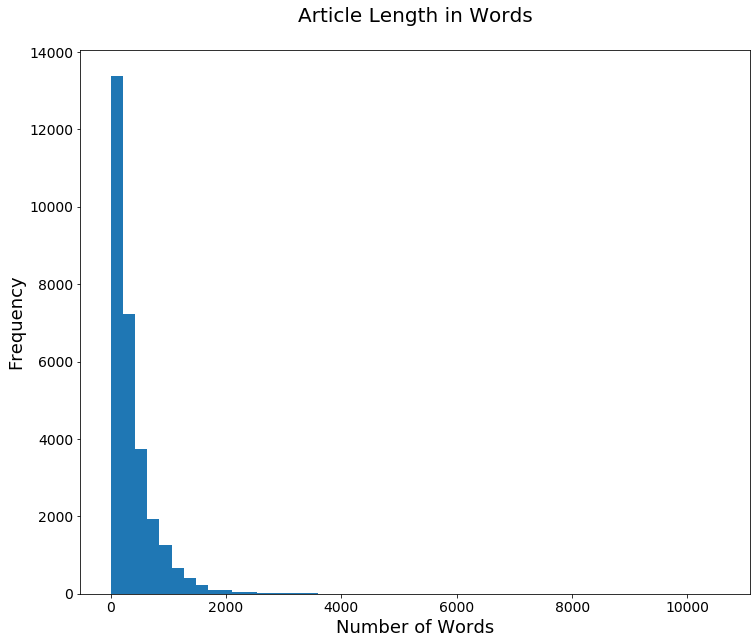

In [10]:
#NUMBER OF WORDS VS FREQUENCY OF ARTICLES
ax=data['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

In [11]:
#unique words in each article
data['uniq_wds'] = data['tokenized'].str.split().apply(lambda x: len(set(x)))
data['uniq_wds'].head()

0    68
1    59
2    78
3    68
4    62
Name: uniq_wds, dtype: int64

In [12]:
#MIN.MAX AND MEAN OF UNIQUE WORDS
print(data['uniq_wds'].mean())
print(data['uniq_wds'].min())
print(data['uniq_wds'].max())

168.8802339901478
1
2671


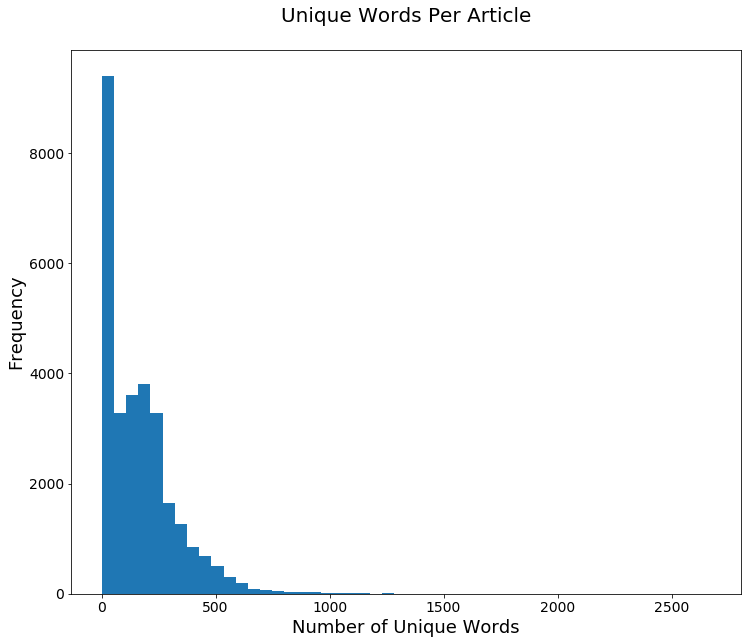

In [13]:
#UNIQUE WORDS PER ARTICLE
ax=data['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);

In [14]:
#common words in articles
wd_counts = Counter()
for i, row in data.iterrows():
    wd_counts.update(row['tokenized'].split())

In [15]:
#COLLECT STOPWORDS
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anonymous/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
#delete the stopwords from our Counter
for sw in stopwords.words('english'):
    del wd_counts[sw]

In [17]:
#Most common words
wd_counts.most_common(20)

[('said', 39338),
 ('क', 33149),
 ('also', 32904),
 ('india', 22777),
 ('covid19', 20758),
 ('coronavirus', 20109),
 ('र', 19197),
 ('new', 19191),
 ('one', 19042),
 ('people', 17870),
 ('स', 16962),
 ('time', 16766),
 ('ह', 16127),
 ('lockdown', 15984),
 ('government', 15075),
 ('cases', 14855),
 ('न', 14693),
 ('news', 14270),
 ('म', 13997),
 ('ल', 13958)]

In [18]:
#find our desired words in an articles
def find_cc_wds(content, cc_wds=['COVID', 'covid-19', 'coronavirus', 'corona', 'virus', 'pandemic', 'msme', 'stressed', 'micro', 'small' ,'medium', 'industry', 'industries', 'package', 'strategy', 'strategies', 'revival', 'eroding', 'cash', 'cashflow', 'loans'
                                 , 'loan', 'invest', 'investing', 'investment', 'business', 'businesses', 'businessman', 'startups', 'startup', 'kickstart', 'start', 'procure', 'procurement', 'sectors', 'poor', 'rich', 'middle-class', 'stakeholders', 'relief', 'relieve', 'khadi', 'village', 'villages', 'stimulus', 'package',
                                 'packages', 'cash loan', 'government', 'central', 'regional', 'center', 'state', 'lockdown', 'quarantine', 'agro', 'agriculture', 'food', 'travel', 'transport', 'health', 'healthcare', 'biomedical', 'medical', 'vaccine', 'vaccines', 'incubator', 'incubators', 'hospital', 'hospitals', 'supply',
                                 'demand', 'supply-chain', 'management', 'airlines', 'colleges', 'hotel', 'hotels', 'schools', 'School', 'education', 'EdTech', 'IT', 'tech', 'technology', 'technologies', 'subsidy', 'virtual', 'remote', 'working', 'unemployed', 'unemployment', 'reskill', 'reskilling', 'online', 'courses', 'skilling', 'salary',
                                 'salary-cut', 'cut', 'reduced', 'forecast', 'forecasting', 'speed', 'labor', 'wage', 'outbreak', 'loss', 'share', 'package', 'layoff']
):
    found = False
    for w in cc_wds:
        if w in content:
            found = True
            break

    if not found:
        disj = re.compile(r'(package\w+\W+(?:\w+\W+){1,5}?government) | (scheme\W+(?:\w+\W+){1,5}?government)')
        if disj.match(content):
            found = True
    return found

In [19]:
#articles with our words
data['cc_wds'] = data['tokenized'].apply(find_cc_wds)
data['cc_wds'].head()

0    True
1    True
2    True
3    True
4    True
Name: cc_wds, dtype: bool

In [20]:
#% of articles with our words
data['cc_wds'].sum() / len(data)*100

76.31020799124248